# Stock Profits vs Unemployment
## Monthly closing Stock price and unemployment rate (y-axis), Year, Month combined (x-axis) for 10 years by line plot

# Part 1: Find Monthly Closing Stock Price in US

In [1]:
# Common_Stockdata.get_stock_data Module import
from Common_Module.Common_Stockdata import get_stock_data
from Common_Module.Common_Unemploymentdata import get_unemployment_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

In [2]:
# Load the Stock DataFrame using the function from common module
stock_info_df = get_stock_data()
stock_info_df

,Date,Open,High,Low,Close,Volume,Year,Month_Number
1089,2019-12-31,211.62,212.7600,211.2000,212.61,18201585,2019,12
1090,2019-12-30,213.50,213.6300,211.1600,212.21,21829913,2019,12
1091,2019-12-27,214.54,214.5600,213.0400,213.61,18142239,2019,12
1092,2019-12-26,212.26,213.8100,212.2300,213.79,17159310,2019,12
1093,2019-12-24,212.00,212.0900,211.4400,211.92,7089020,2019,12
...,...,...,...,...,...,...,...,...
3600,2010-01-08,46.04,46.5500,45.9300,46.55,88886600,2010,1
3601,2010-01-07,46.20,46.2700,45.9200,46.17,77094100,2010,1
3602,2010-01-06,46.39,46.5500,46.0700,46.14,96033000,2010,1
3603,2010-01-05,46.38,46.5000,46.1600,46.42,62935600,2010,1


In [3]:
# Monthly Stock Closing dataFrame
# Open price for each Year, Month & Close price for each Year, Month
monthly_data = stock_info_df.groupby(['Year', 'Month_Number'])
last_close = monthly_data['Close'].last().reset_index()

# dataFrame creation
monthly_close_df = pd.DataFrame({
                                    'Year': last_close['Year'],
                                    'Month_Number': last_close['Month_Number'],
                                    'Monthly_Close': last_close['Close']
                                })

# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_close_merge_df = pd.merge(monthly_close_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_close_final_df = monthly_close_merge_df[["Year", "Month", "Monthly_Close"]]
monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')

monthly_close_final_df

C:\Users\junhy\AppData\Local\Temp\ipykernel_12036\3413687937.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')


,Year,Month,Monthly_Close
0,2010,January,46.42
1,2010,February,43.26
2,2010,March,45.41
3,2010,April,48.16
4,2010,May,49.93
...,...,...,...
115,2019,August,190.15
116,2019,September,185.65
117,2019,October,187.27
118,2019,November,198.87


# Part 2: Find Monthly Unemployment Rate Change

In [4]:
# Load Monthly Unemployment Rate Change DataFrame using the function from common module
unemployment_data_df = get_unemployment_data()
unemployment_data_df

,Year,Month,Rate
0,2019,December,3.6
1,2019,November,3.6
2,2019,October,3.6
3,2019,September,3.5
4,2019,August,3.6
...,...,...,...
115,2010,May,9.6
116,2010,April,9.9
117,2010,March,9.9
118,2010,February,9.8


In [5]:
# Merge two dataFrame (Nasdaq Monthly profit + Monthly Unployment Rate)

MonthlyClose_Unemploy_df = pd.merge(monthly_close_final_df, unemployment_data_df, on= ["Year","Month"], how="inner")
MonthlyClose_Unemploy_df

,Year,Month,Monthly_Close,Rate
0,2010,January,46.42,9.8
1,2010,February,43.26,9.8
2,2010,March,45.41,9.9
3,2010,April,48.16,9.9
4,2010,May,49.93,9.6
...,...,...,...,...
115,2019,August,190.15,3.6
116,2019,September,185.65,3.5
117,2019,October,187.27,3.6
118,2019,November,198.87,3.6


# Part 3: Find Monthly closing Stock price and unemployment rate over 10 years

C:\Users\junhy\AppData\Local\Temp\ipykernel_12036\2447721519.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MonthlyClose_Unemploy_df['Date'] = pd.to_datetime(MonthlyClose_Unemploy_df['Year'].astype(str) + ' ' + MonthlyClose_Unemploy_df['Month'])


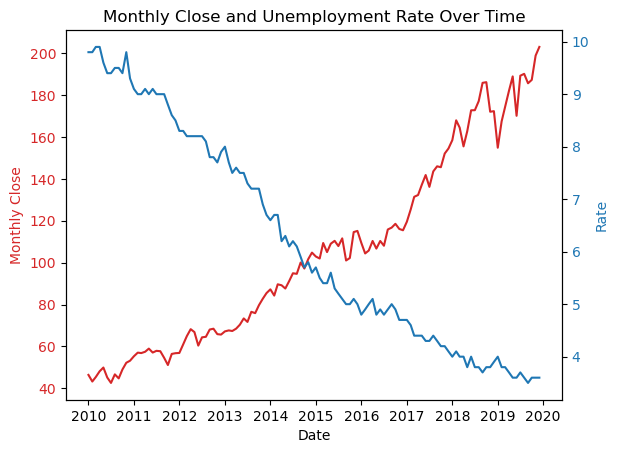

In [6]:
# Combine 'Year' and 'Month' into a 'Date' for plotting
MonthlyClose_Unemploy_df['Date'] = pd.to_datetime(MonthlyClose_Unemploy_df['Year'].astype(str) + ' ' + MonthlyClose_Unemploy_df['Month'])

# Plotting
fig, ax1 = plt.subplots()

# Create first plot - Monthly Close
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Close', color=color)
ax1.plot(MonthlyClose_Unemploy_df['Date'], MonthlyClose_Unemploy_df['Monthly_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Rate data
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Rate', color=color)  
ax2.plot(MonthlyClose_Unemploy_df['Date'], MonthlyClose_Unemploy_df['Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Monthly Close and Unemployment Rate Over Time')
plt.show()
